# Neural Network Classification

I'm going to use a Neural Network model, with Tensorflow's API Keras, in order to classify artists on Spotify, between popular and less popular according some songs' particularity.  
A neural network is an algorithm composed by an input layer, an output layer and a number of hidden layers, there is no certain rule about the correct number.  
This kind of model is widely used in many tasks in which using non linear input manipulation is required such as :image recognition, text analysis, natural language processing.  
This kind of algorithm has a difficult interpretation, it's known to be a black box with no parameters, and it requires a lot of preprocessing like missing imputation, correlation check, near zero or zero variance, and is not able to handle character variables unless they are categorised first.  
In this classification task I'll use a neural network just to show how is the code in python language, but it's possible that a different model may have better performaces needing less preprocess.

## Preparig packages and import modules

In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, Normalizer
from sklearn.decomposition import PCA as sklearnPCA
from tensorflow import keras as ks
import seaborn as sb
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
from numpy.random import seed
seed(80019)

## Importing Data

Data is a CSV containting a record for each song, after data import I'll procede with further data visualisation and descriptive statistics.  
## Variables in the dataset divided by type:  
### Primary:
- id (Id of track generated by Spotify)
Numerical:
- acousticness (Ranges from 0 to 1)
- danceability (Ranges from 0 to 1)
- energy (Ranges from 0 to 1)
- duration_ms (Integer typically ranging from 200k to 300k)
- instrumentalness (Ranges from 0 to 1)
- valence (Ranges from 0 to 1)
- popularity (Ranges from 0 to 100)
- tempo (Float typically ranging from 50 to 150)
- liveness (Ranges from 0 to 1)
- loudness (Float typically ranging from -60 to 0)
- speechiness (Ranges from 0 to 1)
### Dummy:
- mode (0 = Minor, 1 = Major)
- explicit (0 = No explicit content, 1 = Explicit content)
### Categorical:
- key (All keys on octave encoded as values ranging from 0 to 11, starting on C as 0, C# as 1 and so on…)
- timesignature (The predicted timesignature, most typically 4)
- artists (List of artists mentioned)
- artists (Ids of mentioned artists)
- release_date (Date of release mostly in yyyy-mm-dd format, however precision of date may vary)
- name (Name of the song)

The target variable is defined in this way by the Spotify  API Reference:  
*The popularity of the artist. The value will be between 0 and 100, with 100 being the most popular. The artist’s popularity is calculated from the popularity of all the artist’s tracks.*  
In order to classify a song as "Popular" I'll recode the variable from **Numerical** to **Dummy**.  
The dataset has 586672 rows and 17 columns.

In [3]:
data=pd.read_csv("C:/Users/lucaf/OneDrive/Desktop/Programmi/Dati/tracks.csv", delimiter=",")
data.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


In [4]:
data.tail()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
586667,5rgu12WBIHQtvej2MdHSH0,云与海,50,258267,0,['阿YueYue'],['1QLBXKM5GCpyQQSVMNZqrZ'],2020-09-26,0.560,0.518,0,-7.471,0,0.0292,0.785,0.000000,0.0648,0.2110,131.896,4
586668,0NuWgxEp51CutD2pJoF4OM,blind,72,153293,0,['ROLE MODEL'],['1dy5WNgIKQU6ezkpZs4y8z'],2020-10-21,0.765,0.663,0,-5.223,1,0.0652,0.141,0.000297,0.0924,0.6860,150.091,4
586669,27Y1N4Q4U3EfDU5Ubw8ws2,What They'll Say About Us,70,187601,0,['FINNEAS'],['37M5pPGs6V1fchFJSgCguX'],2020-09-02,0.535,0.314,7,-12.823,0,0.0408,0.895,0.000150,0.0874,0.0663,145.095,4
586670,45XJsGpFTyzbzeWK8VzR8S,A Day At A Time,58,142003,0,"['Gentle Bones', 'Clara Benin']","['4jGPdu95icCKVF31CcFKbS', '5ebPSE9YI5aLeZ1Z2g...",2021-03-05,0.696,0.615,10,-6.212,1,0.0345,0.206,0.000003,0.3050,0.4380,90.029,4
586671,5Ocn6dZ3BJFPWh4ylwFXtn,Mar de Emociones,38,214360,0,['Afrosound'],['0i4Qda0k4nf7jnNHmSNpYv'],2015-07-01,0.686,0.723,6,-7.067,1,0.0363,0.105,0.000000,0.2640,0.9750,112.204,4


In [5]:
data.describe()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,586672.000000,5.866720e+05,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000
mean,27.570053,2.300512e+05,0.044086,0.563594,0.542036,5.221603,-10.206067,0.658797,0.104864,0.449863,0.113451,0.213935,0.552292,118.464857,3.873382
std,18.370642,1.265261e+05,0.205286,0.166103,0.251923,3.519423,5.089328,0.474114,0.179893,0.348837,0.266868,0.184326,0.257671,29.764108,0.473162
min,0.000000,3.344000e+03,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.000000,1.750930e+05,0.000000,0.453000,0.343000,2.000000,-12.891000,0.000000,0.034000,0.096900,0.000000,0.098300,0.346000,95.600000,4.000000
50%,27.000000,2.148930e+05,0.000000,0.577000,0.549000,5.000000,-9.243000,1.000000,0.044300,0.422000,0.000024,0.139000,0.564000,117.384000,4.000000
75%,41.000000,2.638670e+05,0.000000,0.686000,0.748000,8.000000,-6.482000,1.000000,0.076300,0.785000,0.009550,0.278000,0.769000,136.321000,4.000000
max,100.000000,5.621218e+06,1.000000,0.991000,1.000000,11.000000,5.376000,1.000000,0.971000,0.996000,1.000000,1.000000,1.000000,246.381000,5.000000


Description and Graphical distribution of the target variable **Popularity**.

In [6]:
data.popularity.describe()

count    586672.000000
mean         27.570053
std          18.370642
min           0.000000
25%          13.000000
50%          27.000000
75%          41.000000
max         100.000000
Name: popularity, dtype: float64

<AxesSubplot:>

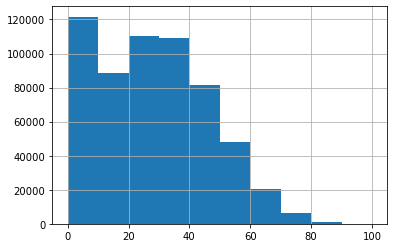

In [7]:
data['popularity'].hist()

After describing the target variable I decided to use the $3^{rd}$ quartile to dichotomise the numeric variable **popularity** in a dummy **popularity_dummy**.

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

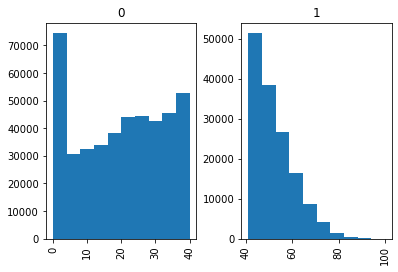

In [8]:
treshold=np.percentile(data.popularity, 75)
treshold
data['popularity_dummy'] = data['popularity'].apply(lambda x: 1 if x>=treshold else 0)
data['popularity'].hist(by=data['popularity_dummy'])


Is possible to see from the histogram that observations are well distributed between the two classes, I don't have to use apriori probabilities or oversampling to perform classification.

## Correlation

The first step to prepare data for analysis is checking for correlated variables in data.

Text(0.5, 1.05, 'Correlation of Data Features')

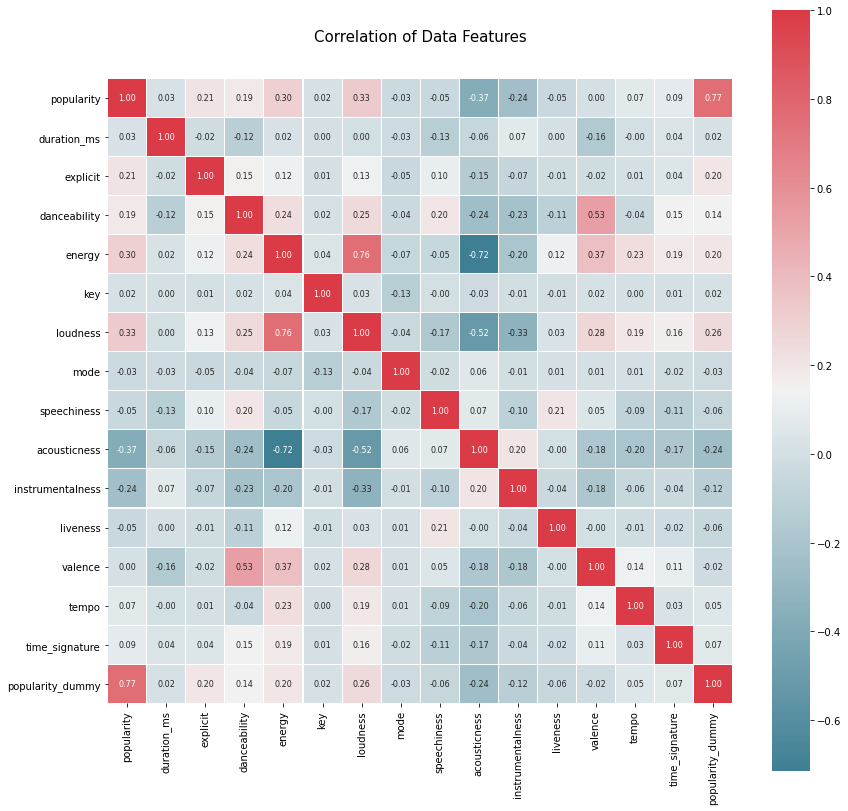

In [9]:
corr = data.iloc[:,2:].corr()
colormap = sns.diverging_palette(220, 10, as_cmap = True)
plt.figure(figsize=(14,14))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 8},
            cmap = colormap, linewidths=0.1, linecolor='white')
plt.title('Correlation of Data Features', y=1.05, size=15)

It's easy to see that there are not strongly correlated variables, only **Energy** and **Acousticness** present an high level of inverse correlation, as is natural to imagine if the energy of the track grows the acousticness decreases; so I won't eliminate any variable unless the algorithm presents problems such as overfitting.  
Is also clear that **Popularity** and **Popolarity Dummy** are strongly correlated.  

## Data Preparation

I'll start data preparation by dropping **ID**, **Name**, **ID Artist**, **Artist** and **Popularity** and **Release Data**.  
The only reason why I delte **ID Artist** and **Artist** is because I don't have a method to chategorise them without adding too much dummy columns or levels, it is possible to use an optimal grouping algorithm to create a variable with less levels which can be used.

In [10]:
data=data.drop(['id', 'name','artists','id_artists','popularity','release_date'], axis = 1)

Now I separate *train* and *test* and after that I'll separeta target variable from explatanory variables.

In [11]:
train,test = train_test_split(data, test_size=0.3, random_state=42)
print(f"Train Dimension : {train.shape} ")
print(f"Test Dimension : {test.shape} ")
train

Train Dimension : (410670, 15) 
Test Dimension : (176002, 15) 


,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,popularity_dummy
329340,264600,0,0.274,0.213,9,-16.757,1,0.0361,0.9310,0.877000,0.0857,0.184,179.663,4,0
228177,236307,0,0.385,0.847,3,-6.593,1,0.0450,0.0619,0.016500,0.3520,0.685,81.316,4,0
287481,342227,0,0.308,0.169,2,-16.244,0,0.0375,0.9320,0.033400,0.1170,0.125,153.481,4,0
196678,184880,0,0.833,0.590,0,-7.149,1,0.0302,0.1030,0.000353,0.0798,0.818,107.377,4,0
398729,200685,0,0.825,0.525,0,-7.195,1,0.1050,0.0570,0.000061,0.0547,0.322,130.014,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110268,246178,0,0.745,0.451,11,-6.314,0,0.1120,0.2120,0.000000,0.0975,0.481,143.908,4,1
259178,157013,0,0.448,0.727,7,-7.692,1,0.1310,0.0239,0.000000,0.0506,0.627,176.011,4,0
365838,188200,0,0.789,0.198,9,-14.683,1,0.0568,0.6720,0.000005,0.1120,0.593,111.417,4,0
131932,307000,1,0.629,0.578,1,-4.704,1,0.0428,0.2000,0.000000,0.1510,0.211,79.940,4,1


In [12]:
# Train
train_y=data['popularity_dummy'];train_y
train_x=data.drop(['popularity_dummy'],axis=1)
train_x = MinMaxScaler().fit_transform(train_x)


#Test
test_y=data['popularity_dummy'];test_y
test_x=data.drop(['popularity_dummy'],axis=1)
test_x = MinMaxScaler().fit_transform(test_x)


## Models

Data are now ready for models.

### Layers Setup

I am performing a binary classification on structured data, so I won't use particular architectures like Convolutional, Recurrent or LSTM nodes.  
I use Dense layers with **relu** and **than** activation, the output layer has **sigmoid** activation function because I need it to return probabilities.  
As already written there is no rule about layer and neuron optimal number, so you can improve you network by trying new combinations,adding different layers, even layers with different functions such as Dropout layer which performes regularisation in order to prevent overfitting.

In [13]:
seed(80019)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(14,input_dim=14, activation = "relu"),
    tf.keras.layers.Dense(13, activation='tanh'),
    tf.keras.layers.Dense(10, activation='tanh'),
    tf.keras.layers.Dense(2, activation='sigmoid')
])

### Model Compilation

During model compilation I'm goign to use :  
- optimizer: RMSprop, is an algorithm which perform Gradient Descent with mainteinig a low magnitude of the gradient;
- loss: MSE, calculated as the mean of squared distance between the real value and the predicted value;
- metric: MAE, calculated as the arithmetic average of the absolute errors;
- metric: Accuracy, calculated as ratio between correctly classified and the total number of observations. 

In [14]:
optimizer=tf.keras.optimizers.RMSprop()
loss=tf.keras.losses.MSE
model.compile(optimizer=optimizer,
              loss=loss,
              metrics=["accuracy","mae"])

### Model Fitting

Now I fit the model on training data, I also use *Validation_split* so the algorithm performs model evaluation directly during fit using 20% of the training set. In this way I will quickly know if my model is a good model.  
I'll let the parameter **Verbose** equal to 1 so it's possible to see all steps the algorithm takes.

In [15]:

history=model.fit(train_x, train_y, epochs=8, batch_size=100,verbose=1,validation_split=0.2)

Epoch 1/8
4694/4694 [==============================] - 8s 2ms/step - loss: 0.1711 - accuracy: 0.5052 - mae: 0.3438 - val_loss: 0.1240 - val_accuracy: 0.4540 - val_mae: 0.2640
Epoch 2/8
4694/4694 [==============================] - 7s 1ms/step - loss: 0.1678 - accuracy: 0.5271 - mae: 0.3350 - val_loss: 0.1254 - val_accuracy: 0.5228 - val_mae: 0.2819
Epoch 3/8
4694/4694 [==============================] - 7s 1ms/step - loss: 0.1667 - accuracy: 0.5284 - mae: 0.3323 - val_loss: 0.1274 - val_accuracy: 0.5377 - val_mae: 0.2874
Epoch 4/8
4694/4694 [==============================] - 7s 1ms/step - loss: 0.1661 - accuracy: 0.5222 - mae: 0.3308 - val_loss: 0.1337 - val_accuracy: 0.5062 - val_mae: 0.2989
Epoch 5/8
4694/4694 [==============================] - 7s 1ms/step - loss: 0.1658 - accuracy: 0.5061 - mae: 0.3308 - val_loss: 0.1318 - val_accuracy: 0.4864 - val_mae: 0.2938
Epoch 6/8
4694/4694 [==============================] - 7s 1ms/step - loss: 0.1655 - accuracy: 0.4941 - mae: 0.3306 - val_loss

This plots represent the trend followed by Loss on train and validation during the model fitting.

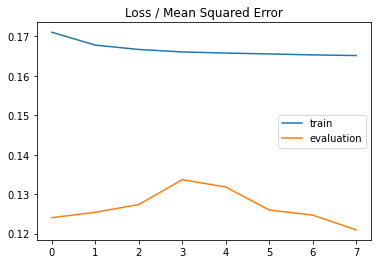

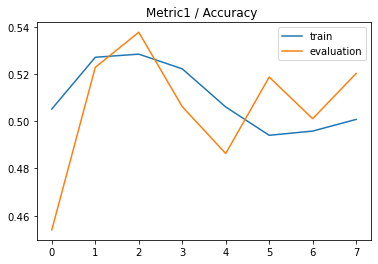

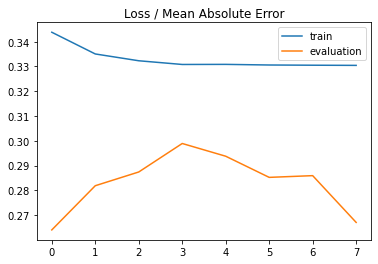

In [17]:
plt.title('Loss / Mean Squared Error')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='evaluation')
plt.legend()
plt.show()
plt.title('Metric1 / Accuracy ')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='evaluation')
plt.legend()
plt.show()
plt.title('Loss / Mean Absolute Error')
plt.plot(history.history['mae'], label='train')
plt.plot(history.history['val_mae'], label='evaluation')
plt.legend()
plt.show()

Just by the way this graphics look it is clear that the classifier is not a good classifier.  
Now I'll perform some other evaluations about the algorithm using the test set.

### Model Evaluation

The last step is evaluating the model on test Data. I already have some information about model performances, now I can make all clear by trying the model on new data.
This is an example code, and I won't go deep in the model tuning, but if you have evaluation lower than train you can have some problems in the algorithm.

In [18]:
test_mae = model.evaluate(test_x, test_y, verbose=1)

18334/18334 [==============================] - 18s 979us/step - loss: 0.1579 - accuracy: 0.5010 - mae: 0.3068


In [19]:
print(f'Model Evalation:\nTest Loss: {round(test_mae[0],4)} Test MAE: {round(test_mae[1],4)}')

Model Evalation:
Test Loss: 0.1579 Test MAE: 0.501


This is a fully working neural network model, you can improve it by updating the model itself and by performing some more preprocessing.  
At this point, if your model is good you can perform predictions, the keras' method I prefer is the following:

In [20]:
prediction=model.predict(test_x)
y_class=prediction.argmax(axis=-1)

There is a Scikit-learn function called "Confusion Matrix" and it is imported in the first code block, but I prefer to create a better labelled confusion matrix using Pandas.

In [21]:

y_actual = pd.Series(test_y, name='Actual')
y_predicted = pd.Series(y_class, name='Predicted')
df_confusion = pd.crosstab(y_actual, y_predicted)

df_confusion

Predicted,0,1
Actual,,
0,221173,217818
1,74939,72742


The confusion matrix makes clear what was already known from validation metrics, this is not a good model for classification.  
I won't perform another model because both this is only a demonstration code with the only objective to show how to create a quick neural network with keras and because in this code you can see that a deep model is not always the best choice and it is important not to espect models to be perfectly fitting  to the data like examples usually do.

There are many possible causes to this bad results, probably is not the right model to use and another model, such as a logistic regression or a random forset, would have made a better classification, or, simply, the variable set used is not suitable for popularity prediction.